# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

(60000, 784)
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0

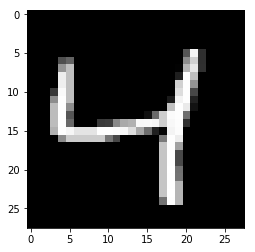

In [12]:
img = mnist.train.images[2]
print(mnist.train.images.shape)
print(img)
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [17]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]
inputs_ = tf.placeholder(tf.float32,(None,image_size),name="inputs")
targets_ = tf.placeholder(tf.float32, (None, image_size), name="targets")

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_ , logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [18]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [19]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6910
Epoch: 1/20... Training loss: 0.6876
Epoch: 1/20... Training loss: 0.6836
Epoch: 1/20... Training loss: 0.6786
Epoch: 1/20... Training loss: 0.6722
Epoch: 1/20... Training loss: 0.6648
Epoch: 1/20... Training loss: 0.6555
Epoch: 1/20... Training loss: 0.6453
Epoch: 1/20... Training loss: 0.6331
Epoch: 1/20... Training loss: 0.6217
Epoch: 1/20... Training loss: 0.6048
Epoch: 1/20... Training loss: 0.5924
Epoch: 1/20... Training loss: 0.5769
Epoch: 1/20... Training loss: 0.5551
Epoch: 1/20... Training loss: 0.5370
Epoch: 1/20... Training loss: 0.5205
Epoch: 1/20... Training loss: 0.5015
Epoch: 1/20... Training loss: 0.4859
Epoch: 1/20... Training loss: 0.4708
Epoch: 1/20... Training loss: 0.4495
Epoch: 1/20... Training loss: 0.4324
Epoch: 1/20... Training loss: 0.4163
Epoch: 1/20... Training loss: 0.4077
Epoch: 1/20... Training loss: 0.3886
Epoch: 1/20... Training loss: 0.3798
Epoch: 1/20... Training loss: 0.3728
E

Epoch: 1/20... Training loss: 0.2009
Epoch: 1/20... Training loss: 0.1993
Epoch: 1/20... Training loss: 0.2011
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1980
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1956
E

Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1614
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1583
E

Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1378
E

Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1323
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1236
E

Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1094
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1108
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1176
E

Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1039
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1085
E

Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1059
E

Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1015
E

Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0996
E

Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0962
E

Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0991
E

Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0909
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0995
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0872
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0998
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0881
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0883
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0883
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

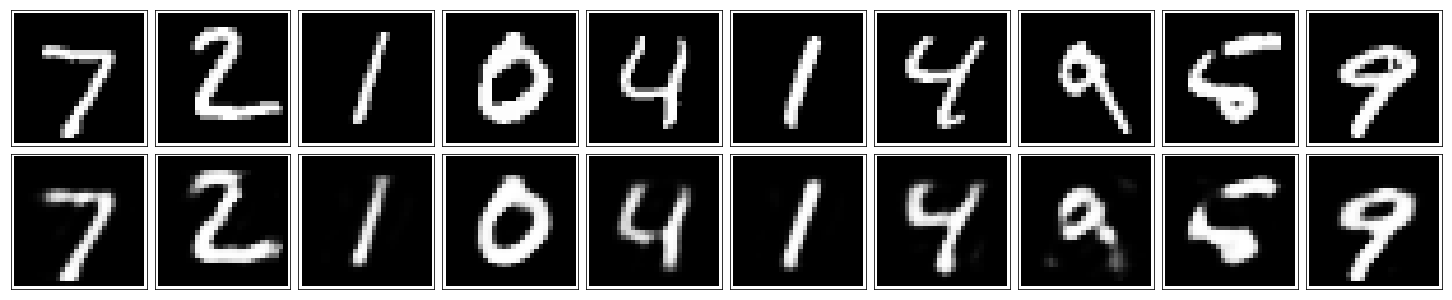

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.